# Random Forest (Rastgele Orman)

* **Random Forest CART yapısınındaki ağac gibi çok daha fazla ağac yaratarak tek tek içlerinden hata işlemleri yapılır. En az hatayı veren ağaca daha çok söz verilir.**
* **Random Forest her ağacın gizli katmanlar olacak hemde ağac sayısı olacaktır.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor  #Random forest için


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#veri
df = pd.read_csv("beyzbol_veri.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### model & tahmin

In [ ]:
random_model = RandomForestRegressor().fit(X_train, y_train)

In [17]:
y_pred = random_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

348.5483780030215

In [18]:
random_model
# n_estimators = 100 ağaç sayısını ifade eder. 
# mim_samples_split = 2, minimum daldaki gözlem sayısını ifade etmekte  eğer daha fazla ise dallanma devam etmekte
# min_samples_leaf = 1, leaf nodedaki minimum gözlem sayısı. 
# max_depth = derinlik ne kadar bölüneceği
# max_features : göz ünunde buluması gereken değişken sayıssı

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Model Tuning

In [19]:
random_model = RandomForestRegressor().fit(X_train, y_train)
random_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

* **Hiperparametreler random_params sözlüğünde yazılmıştır.**

In [20]:
random_params = { "max_depth": [2,8],
                "max_features" :[1,3],
                "min_samples_split":[3,1],
                "n_estimators":[200, 500, 2000]}

In [21]:
random_model_cv = GridSearchCV(random_model, random_params, cv = 10, n_jobs= -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.5min finished


In [22]:
random_model_cv.best_params_

{'max_depth': 8,
 'max_features': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}

In [23]:
random_tuned = RandomForestRegressor(max_depth = 8,
                                    max_features = 3,
                                    min_samples_split=3,
                                    n_estimators= 500).fit(X_train, y_train)

In [24]:
y_pred = random_tuned.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

349.80868358017716

### Değişken Önem Sırası

* **Değişkenlerin model kurulduktan sonra hangisi daha önemli yada daha bağımlı değişkeni hangisi daha etkiler sorusuna cevap vermek için değişken önem sırası yapılabilir.**

In [ ]:
from matplotlib.pyplot import plt

NameError: name 'plt' is not defined

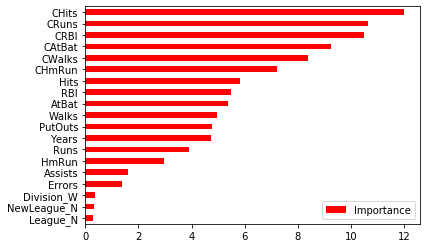

In [25]:
Importance = pd.DataFrame({'Importance':random_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None